# Рынок заведений общественного питания Москвы

**Текст задачи:** Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

---

Для исследования предоставляется открытая база данных о заведениях общественного питания в Москве.

Чтобы убедить инвесторов вложиться в данный проект, необходимо показать им, что кафе является востребованным типом заведений общественного питания в Москве. Для этого будем анализировать открытые данные: рассмотрим, сколько всего заведений каждого типа в городе, какие параметры характерны для каждого из типов. В конце проекта будут предложены рекомендации по открытию кафе.

## Сведения о данных

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns # Импортируем библиотеки для построения графиков
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
data=pd.read_csv('c:/Users/User/rest_data.csv') # Импортируем датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
data.address = data.address.str.lower()
data.head() # Смотрим первые 5 строк

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [4]:
data_copy = data.drop(labels='id', axis=1)
print('Количество дубликатов в данных: ', data_copy.duplicated().sum())

Количество дубликатов в данных:  82


In [5]:
data_copy = data_copy.drop_duplicates()
data_copy.head()

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Таблица сведений о ресторанах включает **6** столбцов и **15366** строк. Пропусков данных нет, тип данных каждого столбца соответствует содержащейся в нем информации. В данных были найдены неявные дубликаты: одинаковые заведения, занесенные в таблицу с разными id (82 шт). Дубликаты были устранены. Далее будет вестись работа с таблицей `data_copy`, включающей теперь **5** столбцов и **15284** строк.  

## Анализ данных

### Исследование соотношения видов объектов общественного питания по количеству

In [6]:
# Создадим вспомогательную таблицу для построения графика
objects = data_copy.groupby('object_type').agg({'object_name':'count'}).sort_values(by='object_name', ascending=False).reset_index()
objects.columns=(['object_type' , 'count'])
objects['type_percent'] = (objects['count'] / objects['count'].sum()).map(lambda x: f"{x:.1%}")
objects

,object_type,count,type_percent
0,кафе,6071,39.7%
1,столовая,2584,16.9%
2,ресторан,2282,14.9%
3,предприятие быстрого обслуживания,1898,12.4%
4,бар,855,5.6%
5,буфет,577,3.8%
6,кафетерий,395,2.6%
7,закусочная,349,2.3%
8,магазин (отдел кулинарии),273,1.8%


Text(0, 0.5, 'Вид объекта')

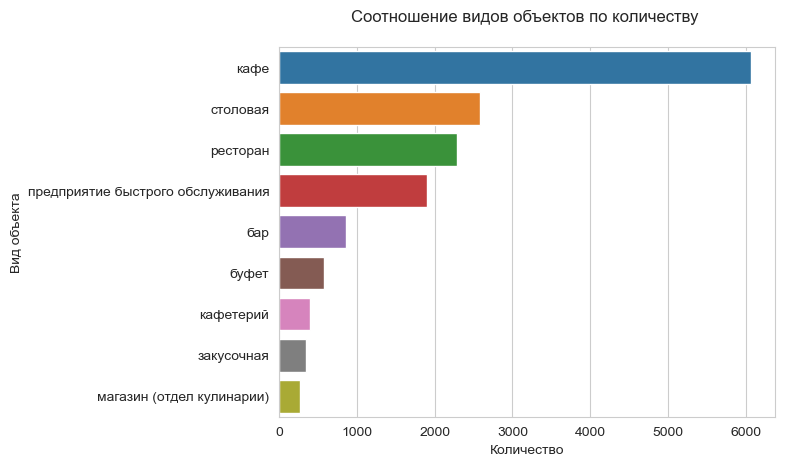

In [7]:
# Для того чтобы визуализировать полученную информацию, подойдет столбчатая диаграмма. Создадим ее методами библиотеки seaborn
sns.set_style('whitegrid')
graf = sns.barplot(x='count', y='object_type', data=objects)
graf.set_title('Соотношение видов объектов по количеству \n')
graf.set_xlabel('Количество')
graf.set_ylabel('Вид объекта')

Заметно выделяется количество кафе: оно превышает **6000**. Другие наиболее популярные виды - столовые и рестораны (примерно **2600** и **2300** заведений соответственно). Также по городу много предприятий быстрого обслуживания (почти **2000**). Остальные типы заведений представлены в количестве меньше 1000, самая малочисленная категория - магазины (отдел кулинарии).

### Исследование соотношения сетевых и несетевых заведений по количеству

In [8]:
# Создадим вспомогательную таблицу для построения графика
chain_object = data_copy.groupby('chain').agg({'object_name':'count'}).sort_values(by='object_name', ascending=False).reset_index()
chain_object.columns=(['chain' , 'count'])
chain_object

,chain,count
0,нет,12320
1,да,2964


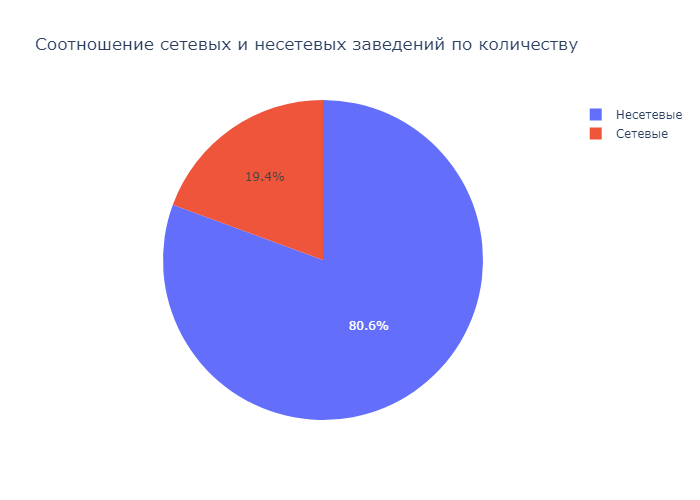

In [31]:
# Отобразим данные в виде круговой диаграммы, построенной при помощи библиотеки plotly
from plotly import graph_objects as go
fig = go.Figure(data=[go.Pie(labels=chain_object['chain'], values=chain_object['count'])])
fig.update_layout(title='Соотношение сетевых и несетевых заведений по количеству')
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые'] # Заменим "нет" и "да" на более понятные для восприятия слова

fig.show("png")

Как видно из графика, из всего количества заведений сетевыми являются только **19,4%**, остальные - несетевые.

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [10]:
# Создадим вспомогательную таблицу, похожую на таблицу из пункта 2.1, исключив несетевые заведения
chain_objects = data_copy[data_copy['chain']=='да'].groupby('object_type').agg({'object_name':'count'}).sort_values(by='object_name', ascending=False).reset_index()

# Объединим с таблицей из пункта 2.1
chain_objects = chain_objects.merge(objects[['object_type', 'count']], left_on='object_type', right_on='object_type')
chain_objects.columns=(['object_type' , 'chain', 'count'])

# Добавим в полученную таблицу столбец с процентом конкретного типа объекта от всех заведений
chain_objects['type_percent'] = (chain_objects['chain'] / chain_objects['count']*100).round(2)
chain_objects

,object_type,chain,count,type_percent
0,кафе,1396,6071,22.99
1,предприятие быстрого обслуживания,788,1898,41.52
2,ресторан,543,2282,23.79
3,магазин (отдел кулинарии),78,273,28.57
4,закусочная,56,349,16.05
5,кафетерий,52,395,13.16
6,бар,37,855,4.33
7,буфет,11,577,1.91
8,столовая,3,2584,0.12


Text(0, 0.5, 'Вид объекта')

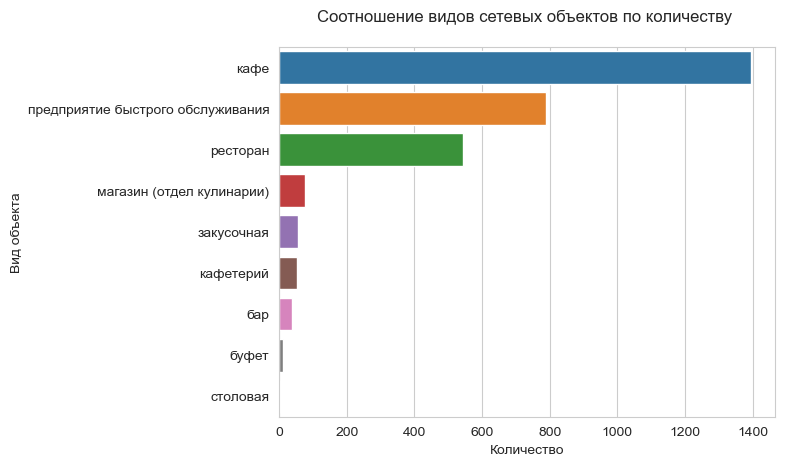

In [11]:
sns.set_style('whitegrid')
graf = sns.barplot(x='chain', y='object_type', data=chain_objects)
graf.set_title('Соотношение видов сетевых объектов по количеству \n')
graf.set_xlabel('Количество')
graf.set_ylabel('Вид объекта')

По количеству сетевых заведений лидируют кафе, которых около **1400**. Также много предприятий быстрого обслуживания и ресторанов. Посмотрим, какую долю от всех объектов занимают сетевые заведения по типам:

Text(0, 0.5, 'Вид объекта')

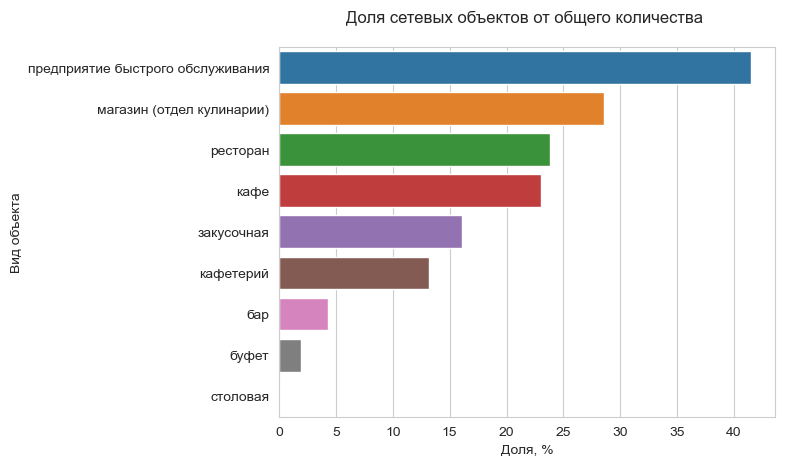

In [12]:
sns.set_style('whitegrid')
graf = sns.barplot(x='type_percent', y='object_type', data=chain_objects.sort_values('type_percent', ascending=False))
graf.set_title('Доля сетевых объектов от общего количества \n')
graf.set_xlabel('Доля, %')
graf.set_ylabel('Вид объекта')

Как видно из графика, сетевое распространение наиболее характерно для предприятий быстрого обслуживания: около **40%** заведений. Сетевые магазины составляют чуть меньше **30%** заведений. Также лидируют рестораны и кафе (около **23-24%** заведений).

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Чтобы ответить на этот вопрос, необходимо изучить совместное распределение количества сетевых заведений и количества посадочных мест в них. Для этого понадобится построить диаграмму рассеяния.

In [13]:
# Строим вспомогательную таблицу с количеством объектов в сети и медианным числом посадочных мест в заведениях
chain_objects = data_copy[data_copy['chain']=='да'].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
chain_objects.head(10) # Проверим, что таблица построена верно

,objects,median_number
object_name,,
Beverly Hills Diner,1,88.0
Bierloga,1,75.0
Black & White,1,40.0
Bocconcino,3,68.0
BooBo,1,46.0
Bubbleology,1,6.0
Burger Club,3,20.0
COFIX,3,10.0
CORREAS,1,32.0


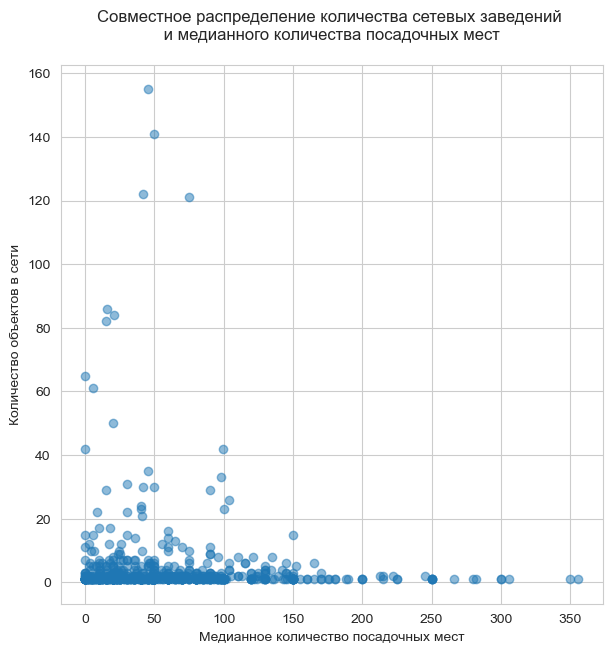

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(chain_objects['median_number'], chain_objects['objects'], alpha=0.5)
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Количество объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \n и медианного количества посадочных мест \n')
plt.show()

Из графика видно, что чем больше заведений в сети - тем меньше в них посадочных мест. В основном в заведениях не более **150** мест, а в сети обычно не более **7** заведений. Можно сказать, что для сетевых заведений более характерно малое количество заведений с большим количеством посадочных мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [15]:
# Соберем сводную таблицу
objects = data_copy.pivot_table(index='object_type', values='number', aggfunc='median').sort_values(by='number', ascending=False).reset_index()
objects.columns=['object_type', 'number_of_seats']
objects.head() # Выделим первые 5 типов заведений с наибольшим средним количеством посадочных мест

,object_type,number_of_seats
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30


Text(0, 0.5, 'Вид объекта')

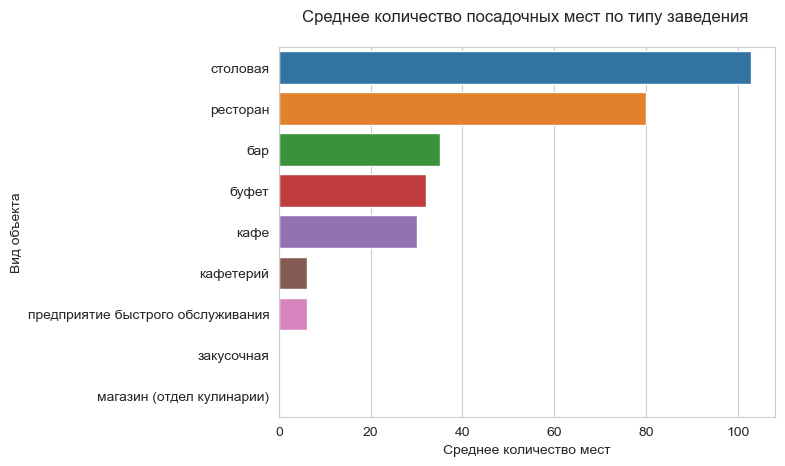

In [16]:
sns.set_style('whitegrid')
graf = sns.barplot(x='number_of_seats', y='object_type', data=objects)
graf.set_title('Среднее количество посадочных мест по типу заведения \n')
graf.set_xlabel('Среднее количество мест')
graf.set_ylabel('Вид объекта')

Как видно из графика, наибольшее среднее число посадочных мест в столовых (чуть больше **100**). Также много посадочных мест в ресторанах (в среднем **80**).

### Выделите в отдельный столбец информацию об улице из столбца "address"

In [17]:
# Создадим универсальный паттерн
pattern = '(([а-яА-Я0-9\-ёй\s"]+)?(улица|переулок|шоссе|бульвар|проспект|проезд|площадь|аллея|набережная)([а-яА-Я0-9\-ёй\s"]+)?)'
# Добавим столбец с названием улицы, используя созданный выше паттерн
data_copy['street'] = data_copy['address'].str.extract(pat = pattern)[0]
data_copy['street'] = data_copy['street'].str.strip()
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15284 non-null  object
 1   chain        15284 non-null  object
 2   object_type  15284 non-null  object
 3   address      15284 non-null  object
 4   number       15284 non-null  int64 
 5   street       14868 non-null  object
dtypes: int64(1), object(5)
memory usage: 835.8+ KB


В новом столбце `street` имеются пропуски. Это может быть связано с тем, что названия улиц содержат ключевые слова, которые не были указаны в паттерне. Либо это могут быть адреса в посёлках, не имеющие названий улиц или улиц вообще. Количество пропусков невелико, поэтому оно не сильно повлияет на дальнейшие исследования.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [19]:
# Создадим таблицу с улицами и количеством объектов на них
top_streets = data_copy.groupby('street').agg({'object_name':'count'}).reset_index()
top_streets.columns = ['street', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10) # Выделим топ-10 улиц
top10_streets

,street,objects
1058,проспект мира,204
1062,профсоюзная улица,182
688,ленинградский проспект,172
1017,пресненская набережная,167
401,варшавское шоссе,165
691,ленинский проспект,148
1054,проспект вернадского,128
678,кутузовский проспект,114
601,каширское шоссе,111
609,кировоградская улица,108


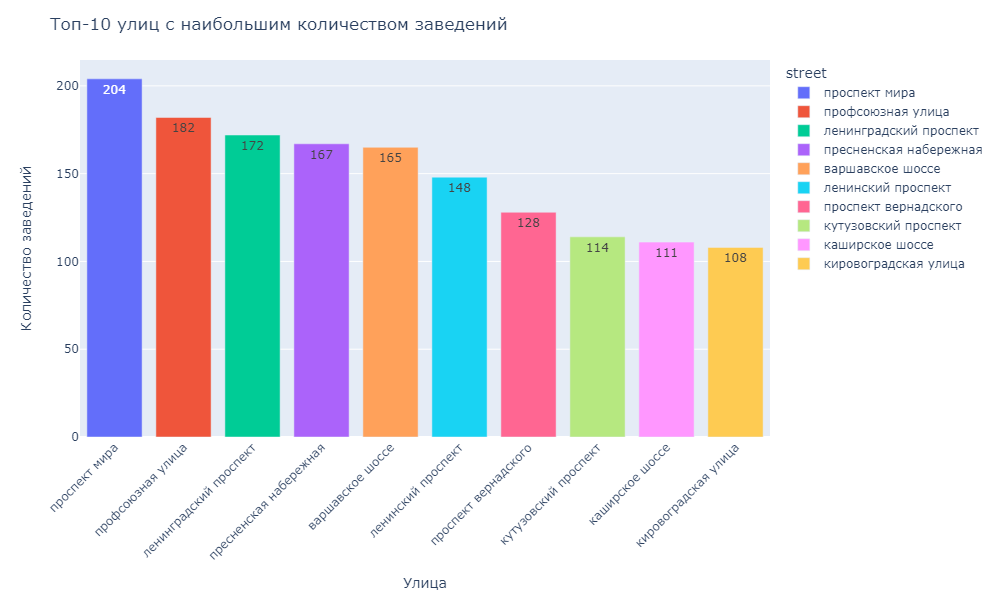

In [32]:
# Построим столбчатую диаграмму методами plotly 

fig = px.bar(top10_streets, x='street', y='objects', 
             color='street', width = 1000, height = 600, text='objects')
fig.update_xaxes(tickangle=-45)
fig.update_layout(
    title='Топ-10 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений")
fig.show("png")

Для того чтобы узнать в каких районах города находятся эти улицы, необходимо воспользоваться внешними данными. Нужные данные получены из справочника Мосгаза.

In [21]:
# Выгружаем внешние данные из гугл-таблиц
from io import BytesIO
import requests
spreadsheet_id = '1M6O6xXROcw3jtdtOHCE8Napr8TVpvivPeAIX9NHsF9o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.columns = ['street', 'areaid', 'okrug', 'area']
df.street = df.street.str.lower()
df.head()

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [22]:
# Далее объединяем новый датафрейм с исходным
top10_streets_areas = top10_streets.merge(df)
top10_streets_areas # Получаем датафрейм, в котором указано, к каким районам города принадлежит каждая улица из топ-10

,street,objects,areaid,okrug,area
0,проспект мира,204,70,СВАО,Алексеевский район
1,проспект мира,204,86,СВАО,Ярославский Район
2,проспект мира,204,78,СВАО,Район Марьина роща
3,проспект мира,204,79,СВАО,Останкинский район
4,проспект мира,204,81,СВАО,Район Ростокино
5,проспект мира,204,82,СВАО,Район Свиблово
6,проспект мира,204,16,ЦАО,Мещанский район
7,профсоюзная улица,182,123,ЮЗАО,Академический район
8,профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Для удобства сгруппируем таблицу по названиям улиц и соберем уникальные названия районов, к которым каждая улица принадлежит:  

In [23]:
pd.options.display.max_colwidth = 250

In [24]:
top10_streets_areas.groupby('street').agg({'area': 'unique'})

,area
street,
варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
кировоградская улица,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
пресненская набережная,[Пресненский район]
проспект вернадского,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"
проспект мира,"[Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район]"


### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [25]:
# Создадим таблицу с улицами, на которых находится только 1 объект общественного питания
streets_1_object = top_streets[top_streets['objects']==1]
streets_1_object.info()
streets_1_object.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 47 to 1881
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   street   536 non-null    object
 1   objects  536 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


,street,objects
47,1-я аэропортовская улица,1
38,1-й саратовский проезд,1
265,банный проезд,1
45,1-й тушинский проезд,1
224,авиационный переулок,1


Исходя из полученной таблицы, число улиц с одним объектом общественного питания: **536**.

In [26]:
# Объединим полученную выше таблицу с внешними данными Мосгаза
streets_1_object_areas = streets_1_object.merge(df)
streets_1_object_areas # Получаем датафрейм, в котором указано, к каким районам города принадлежит каждая из улиц

,street,objects,areaid,okrug,area
0,1-я аэропортовская улица,1,54,САО,Район Аэропорт
1,1-й саратовский проезд,1,121,ЮВАО,Район Текстильщики
2,банный проезд,1,16,ЦАО,Мещанский район
3,1-й тушинский проезд,1,89,СЗАО,Район Покровское-Стрешнево
4,авиационный переулок,1,54,САО,Район Аэропорт
...,...,...,...,...,...
545,елоховский проезд,1,13,ЦАО,Басманный район
546,егорьевский проезд,1,115,ЮВАО,Район Люблино
547,улица алексея дикого,1,31,ВАО,Район Новогиреево
548,улица анатолия живова,1,17,ЦАО,Пресненский район


Выведем таблицу топ-10 районов по количеству улиц с одним заведением:

In [27]:
streets_1_object_areas = streets_1_object_areas.groupby('area').agg({'street': 'count'}).sort_values(by='street', ascending = False)
streets_1_object_areas.head(10)

,street
area,
Район Хамовники,26
Таганский район,25
Басманный район,24
Тверской район,20
Пресненский район,19
Район Арбат,18
Район Марьина роща,18
Мещанский район,16
Район Замоскворечье,14


В основном эти районы находятся в центре Москвы.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [28]:
# Создадим таблицу-срез исходной таблицы, но только с заведениями на улицах из топ-10
top10_streets_list = top10_streets['street'].to_list()
top10_streets_data = data_copy.query('street in @top10_streets_list')
top10_streets_data

,object_name,chain,object_type,address,number,street
151,Кафе «Андерсон»,да,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,Кафе «Subway»,да,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,Кафе «Ламаджо»,нет,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,Шаурма в пите,нет,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,Выпечка,нет,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...
15308,ДОДО пицца,да,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная
15325,Милти,да,предприятие быстрого обслуживания,"город москва, ленинградский проспект, дом 80, корпус 17",0,ленинградский проспект
15347,Кальянная «Мята Lounge»,да,кафе,"город москва, профсоюзная улица, дом 142, корпус 1, строение 1",40,профсоюзная улица
15350,Мята,да,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе


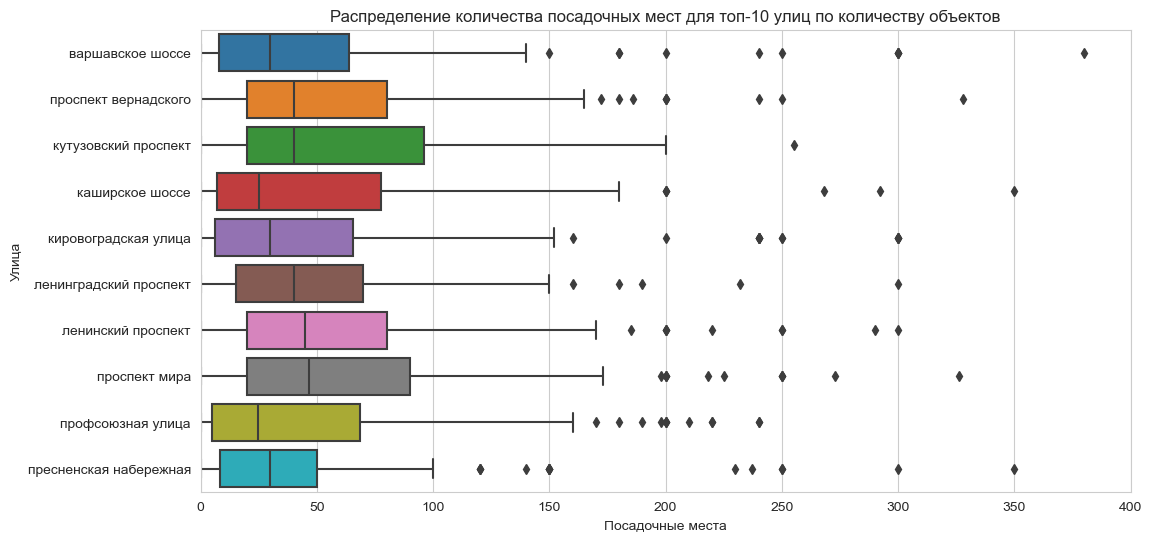

Среднее количество посадочных мест в заведениях на улицах из топ-10:  40.0
Среднее количество посадочных мест в заведениях на улицах Москвы:  40.0


In [29]:
# Создадим boxplot, чтобы показать распределение количества посадочных мест
plt.figure(figsize=(12,6))
plt.xlim(0,400)
sns.boxplot(data=top10_streets_data, x='number', y='street')
plt.title('Распределение количества посадочных мест для топ-10 улиц по количеству объектов')
plt.ylabel('Улица')
plt.xlabel('Посадочные места')
plt.show()

print('Среднее количество посадочных мест в заведениях на улицах из топ-10: ', top10_streets_data['number'].median())
print('Среднее количество посадочных мест в заведениях на улицах Москвы: ', data['number'].median())

Явных закономерностей не видно, но можно сказать о том, что разницы между количеством посадочных мест на топ-10 улицах и их количеством на всех остальных улицах города *нет*. В среднем **40** посадочных мест на топ-10 улицах и на остальных улицах Москвы. 

## Выводы

**В ходе проекта выявлено:** 
1. По общему количеству в городе Москва больше всего кафе (`40% заведений`). Также довольно много столовых (`17%`), ресторанов (`15%`) и предприятий быстрого обслуживания (`12,5%`).

2. Сетевыми в Москве являются только `19%` заведений, остальные - несетевые.

3. Сетевое распространение наиболее характерно для предприятий быстрого обслуживания (`41% заведений`). Также оно характерно для магазинов (`29%`), ресторанов (`24%`) и кафе (`23%`).

4. Для сетевых заведений характерно малое количество заведений с большим количеством посадочных мест. В сети обычно `7` заведений и не более `150` посадочных мест.


5. Топ-5 типов заведений по среднему количеству посадочных мест:
  - столовые (103 места);
  - рестораны (80 мест);  
  - бары (35 мест);  
  - буфеты (32 места);  
  - кафе (30 мест).
  
  
6. Топ-10 улиц с наибольшим количеством заведений:
  - проспект Мира (204 заведения);
  - Профсоюзная улица (182 заведения);
  - Ленинградский проспект (172 заведения);
  - Пресненская набережная (167 заведений);
  - Варшавское шоссе (165 заведений);
  - Ленинский проспект (148 заведений);
  - проспект Вернадского (128 заведений);
  - Кутузовский проспект (114 заведений);
  - Каширское шоссе	(111 заведений);
  - Кировоградская улица (108 заведений).
  
  
7. Определено, к каким районам города относится каждая улица из списка топ-10 по количеству заведений, составлена таблица. Помимо этого, было найдено число улиц только с одним заведением общественного питания - оно составило `537`. Далее было определено, к каким районам города относятся эти улицы, составлена таблица.

8. Среднее количество посадочных мест в заведениях на топ-10 улицах составило `40`, столько же, сколько в остальных заведениях города. Разницы нет.

---

**Рекомендации** по открытию кафе с официантами-роботами следующие: исходя из исследования, кафе являются довольно популярным типом заведений общественного питания в Москве. В городе более 6000 кафе, а значит, что если они открывались и продолжают функционировать, то люди отдают предпочтение такому типу заведений. Кафе с роботами - интересная идея и вложиться инвесторам в это дело можно. Главное, чтобы качество услуг было хорошим, иначе на одном интересе долго кафе не проживет. 30 посадочных мест - оптимальный вариант.

Касаемо расположения - лучше выбрать наиболее проходимые места в городе. Скорее всего, наиболее проходимые улицы - это те, которые входят в топ-10 по количеству заведений, но это не обязательно может оказаться так. Исследование не очень подробное, поэтому следует рассмотреть еще множество факторов, которые повлияют на доход от бизнеса. Например, определить, какая будет целевая аудитория посетителей такого кафе. Если это студенты, то рассмотреть места рядом с университетами / станциями метро. Также желательно подбирать место для заведения, в районе которого будет не очень много конкурентов.

In [30]:
print('Презентация по проекту представлена по ссылке ниже:')
from IPython.core.display import display, HTML
display(HTML("""<a href="https://disk.yandex.ru/i/KcJHZ4sID2NKqQ">Ссылка на презентацию</a>"""))

Презентация по проекту представлена по ссылке ниже:
